# Import Libraries

In [82]:
import os
import cv2
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fungsi Menampilkan Citra

In [83]:
# Fungsi untuk menampilkan citra
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Model K-Means

In [84]:
# Fungsi untuk melakukan segmentasi dengan K-Means
def kmeans_segmentation(image, k=2):
    pixels = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    # Gunakan dimensi citra asli
    segmented_image = kmeans.labels_.reshape(image.shape[:2])
    return segmented_image

# Pembacaan Data Citra

In [85]:
# Direktori dataset
dataset_dir = 'data/img'

# Pilih 5 citra plat nomor secara acak dari seluruh dataset
all_image_files = []
for root, dirs, files in os.walk(dataset_dir):
    all_image_files.extend([os.path.join(root, file) for file in files])

# Pilih secara acak 5 citra plat nomor
selected_images = random.sample(all_image_files, 5)

# Cetak Data Citra

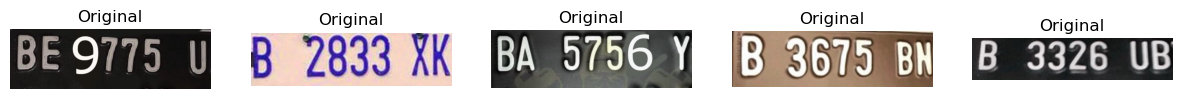

In [86]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in selected_images]
show_images(original_images, titles=['Original']*len(original_images))

# Pre-Processing

In [87]:
# Pra-pemrosesan: Merubah color space menjadi grayscale
grayscale_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in original_images]

# Pra-pemrosesan: Reduksi dimensi menggunakan PCA pada saluran warna
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

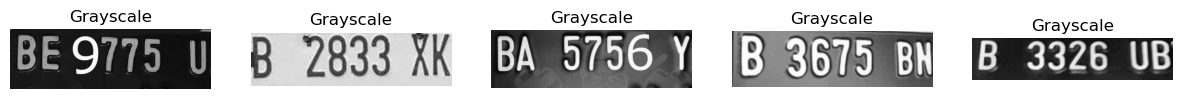

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


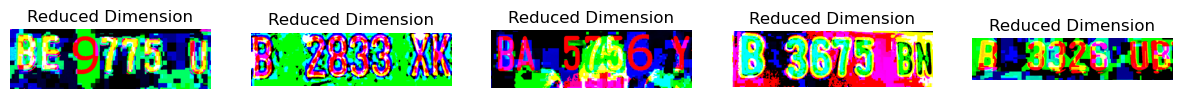

In [88]:
show_images(grayscale_images, titles=['Grayscale']*len(grayscale_images))
show_images(reduced_images, titles=['Reduced Dimension']*len(reduced_images))

# Proses Segmentasi

In [89]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_pca = [kmeans_segmentation(img) for img in reduced_images]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [90]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_gray = [kmeans_segmentation(img) for img in grayscale_images]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: cannot reshape array of size 50836 into shape (213,716)

# Hasil Segementasi

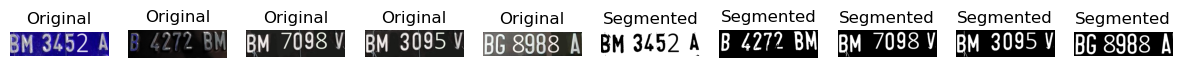

In [81]:
# Tampilkan perbandingan citra sebelum dan sesudah segmentasi
show_images(original_images + segmented_images, titles=['Original']*len(original_images) + ['Segmented']*len(segmented_images_pca))

In [ ]:
# Tampilkan perbandingan citra sebelum dan sesudah segmentasi
show_images(original_images + segmented_images, titles=['Original']*len(original_images) + ['Segmented']*len(segmented_images_gray))